# Define the robot
### Kuka 120 R3100-2 F 6-axis robot arm
###### https://www.kuka.com/-/media/kuka-downloads/imported/6b77eecacfe542d3b736af377562ecaa/0000346490_en.pdf?rev=e246fdb8743a4a999c81d13e0b25edda&hash=147B0AC7C0BFC5D3E91708E32226E6F8

In [105]:
# import libraries
import roboticstoolbox as rtb
import numpy as np
import matplotlib.pyplot as plt
import spatialmath as smath
from roboticstoolbox import *
from math import *
from spatialmath import *
from spatialmath.base import *
from scipy import *
from mpl_toolkits.mplot3d import *
from roboticstoolbox.backends import *
from dual_quaternions import *


DHRobot: 6R, 6 joints (RRRRRR), dynamics, standard DH parameters
┌───────────┬───────┬───────┬────────┬─────────────┬────────────┐
│    θⱼ     │  dⱼ   │  aⱼ   │   ⍺ⱼ   │     q⁻      │     q⁺     │
├───────────┼───────┼───────┼────────┼─────────────┼────────────┤
│ q1        │ 0.645 │  0.33 │ -90.0° │  -590905.1° │  590905.1° │
│ q2        │     0 │ 0.135 │   0.0° │  -459592.9° │  -16414.0° │
│ q3 + 90°  │     0 │ 0.115 │  90.0° │  -393936.8° │  -16414.0° │
│ q4 + 90°  │  1.42 │     0 │  90.0° │ -1148982.2° │ 1148982.2° │
│ q5 + 180° │     0 │     0 │   0.0° │  -402143.8° │  402143.8° │
│ q6 + 90°  │     0 │  0.24 │   0.0° │ -1148982.2° │ 1148982.2° │
└───────────┴───────┴───────┴────────┴─────────────┴────────────┘

┌─┬──┐
└─┴──┘



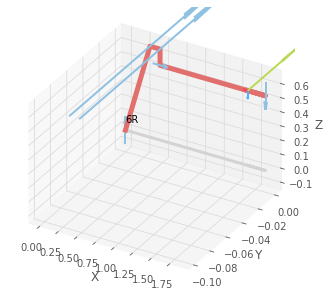

<Figure size 432x288 with 0 Axes>

In [106]:
# link 1
a1 = .330 #m 
d1 = .645 #m
lminf1 = -180 #degrees
lmaxf1 = +180 #degrees
lmin1 = lminf1 * 180/pi #radians
lmax1 = lmaxf1 * 180/pi #radians

# link 2
a2 = .1350 #m
lminf2 = -140 #degrees
lmaxf2 = -5 #degrees
lmin2 = lminf2 * 180/pi #radians
lmax2 = lmaxf2 * 180/pi #radians

#link 3
a3 = .115 #m
lminf3 = -120 #degrees
lmaxf3 = -5 #degrees
lmin3 = lminf3 * 180/pi #radians
lmax3 = lmaxf3 * 180/pi #radians

#link 4
a4 = 0 #m
d4 = 1.420 #m
lminf4 = -350 #degrees
lmaxf4 = 350 #degrees
lmin4 = lminf4 * 180/pi #radians
lmax4 = lmaxf4 * 180/pi #radians

#link 5
a5 = 0 #m
lminf5 = -122.5 #degrees
lmaxf5 = 122.5 #degrees
lmin5 = lminf5 * 180/pi #radians
lmax5 = lmaxf5 * 180/pi #radians

#link 6
a6 = .240 #m
d6 = 0 #m
lminf6 = -350 #degrees
lmaxf6 = 350 #degrees
lmin6 = lminf6 * 180/pi #radians
lmax6 = lmaxf6 * 180/pi #radians

g = 9.81 #m/s^2

# create the robot
L1 = RevoluteDH(a=a1, d=d1, alpha=-pi/2, qlim=[lmin1, lmax1])
L2 = RevoluteDH(a=a2, qlim=[lmin2, lmax2])
L3 = RevoluteDH(a=a3, alpha=pi/2, qlim=[lmin3, lmax3], offset=pi/2)
L4 = RevoluteDH(a=a4, d=d4, alpha=pi/2, qlim=[lmin4, lmax4],offset=pi/2)
L5 = RevoluteDH(a=a5, qlim=[lmin5, lmax5],offset= pi)
L6 = RevoluteDH(a=a6, d=d6, qlim=[lmin6, lmax6],offset=pi/2)

Kuka120 = DHRobot([L1, L2, L3, L4, L5, L6], gravity=[0, g, 0], name="6R") # gravity acts in (x,y,z), name is optional
# shows dh table
print(Kuka120) 

# shows the robot
Kuka120.plot(q=[0,0,0,0,0,0], block=False)
plt.savefig('Kuka120._DH.png')


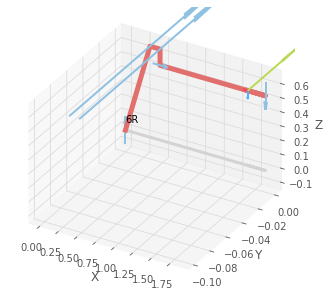

<Figure size 432x288 with 0 Axes>

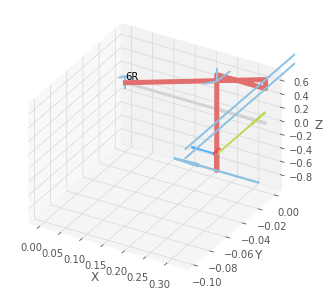

<Figure size 432x288 with 0 Axes>

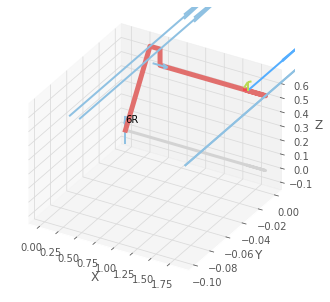

<Figure size 432x288 with 0 Axes>

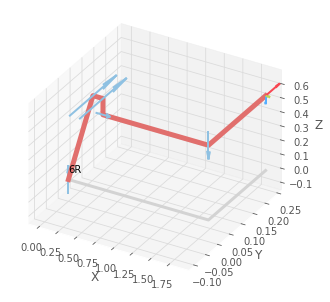

<Figure size 432x288 with 0 Axes>

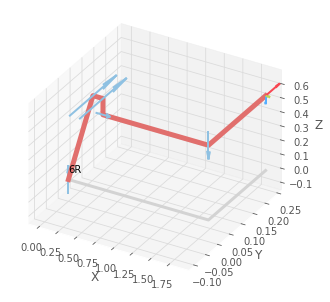

PyPlot3D backend, t = 0.05, scene:
  6R

<Figure size 432x288 with 0 Axes>

In [107]:
Kuka120.addconfiguration('qz', [0, 0, 0, 0, 0, 0])
Kuka120.addconfiguration('qr', [0, pi/2, 0, 0, 0, 0])
Kuka120.addconfiguration('qs', [0, 0, 0, pi/2, 0, 0])
Kuka120.addconfiguration('qt', [0, 0, 0, 0, 0, pi/2])
Kuka120.addconfiguration('qy', [0, 0, 0, 0, pi/2, 0])

# shows the robot
Kuka120.plot(Kuka120.configs['qz'], block=False)
Kuka120.plot(Kuka120.configs['qr'], block=False)
Kuka120.plot(Kuka120.configs['qs'], block=False)
Kuka120.plot(Kuka120.configs['qt'], block=False)
Kuka120.plot(Kuka120.configs['qy'], block=False)




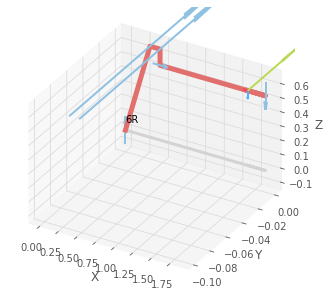

PyPlot3D backend, t = 0.3, scene:
  6R

<Figure size 432x288 with 0 Axes>

In [108]:
# define home robot position
qhome = [0, 0, 0, 0, 0, 0]

# define home robot sack position
qsack = [pi/6,-pi/3,pi/2,0,pi/3,0]

# define home robot sack position


# define a trajectory
q = np.array([
    [0, 0, 0, 0, 0, 0],
    [0, pi/2, 0, 0, 0, 0],
    [0, 0, 0, pi/2, 0, 0],
    [0, 0, 0, 0, 0, pi/2],
    [0, 0, 0, 0, pi/2, 0],
    [0, 0, 0, 0, 0, 0]
])

# show the trajectory
Kuka120.plot(q, block=False)



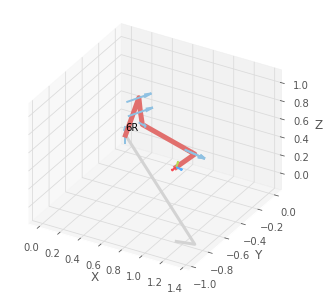

PyPlot3D backend, t = 0.05, scene:
  6R

<Figure size 432x288 with 0 Axes>

In [109]:
# define a trajectory X Y Z T1 T2 T3
q = np.array([1.5, -.8, 0.5, 0, -90, 0])
q = np.array([q[0], q[1], q[2], q[3]*180/pi, q[4]*180/pi, q[5]*180/pi])
# inverse kinematics
q = SE3(q[0:3]) * SE3.Rx(q[3]) * SE3.Ry(q[4]) * SE3.Rz(q[5])
q = Kuka120.ikine_LM(q)
# show the trajectory
Kuka120.plot(q[0], block=False)


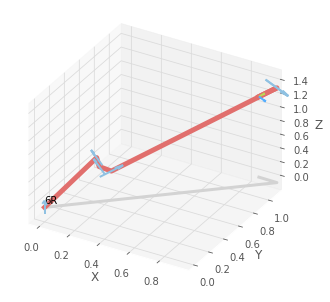

PyPlot3D backend, t = 0.05, scene:
  6R

<Figure size 432x288 with 0 Axes>

In [110]:
q1 = np.array([1,1,1,0,-90,0])
q1 = np.array([q1[0], q1[1], q1[2], q1[3]*180/pi, q1[4]*180/pi, q1[5]*180/pi])
# inverse kinematics
q1 = SE3(q1[0:3]) * SE3.Rx(q1[3]) * SE3.Ry(q1[4]) * SE3.Rz(q1[5])
q1 = Kuka120.ikine_LM(q1)
# show the trajectory
Kuka120.plot(q1[0], block=False)


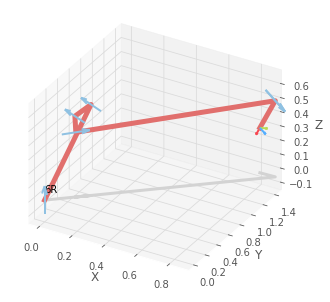

array([ 0.95958751,  2.58616817, -2.64326716, -1.24673374,  0.63710535,
        0.63710535])

<Figure size 432x288 with 0 Axes>

In [111]:
q2 = np.array([1,1,.2,0,-90,0])
q2 = np.array([q2[0], q2[1], q2[2], q2[3]*180/pi, q2[4]*180/pi, q2[5]*180/pi])
# inverse kinematics
q2 = SE3(q2[0:3]) * SE3.Rx(q2[3]) * SE3.Ry(q2[4]) * SE3.Rz(q2[5])
q2 = Kuka120.ikine_LM(q2)
# show the trajectory
Kuka120.plot(q2[0], block=False)

q2[0]

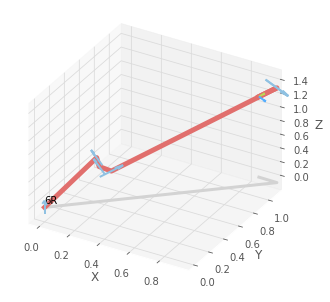

PyPlot3D backend, t = 2.499999999999999, scene:
  6R

<Figure size 432x288 with 0 Axes>

In [112]:
#qt1 = rtb.jtraj(Kuka120.configs[q1[0]],Kuka120.configs[q2[0]], 50)
qt1 = rtb.jtraj(q1[0],q2[0], 50)
Kuka120.plot(qt1.q)

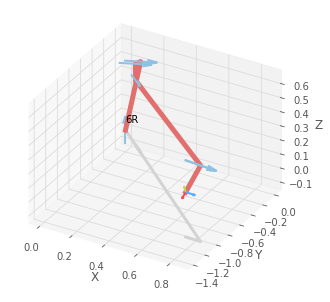

PyPlot3D backend, t = 0.05, scene:
  6R

<Figure size 432x288 with 0 Axes>

In [113]:
q3 = np.array([1,-1,.2,0,-90,0])
q3 = np.array([q3[0], q3[1], q3[2], q3[3]*180/pi, q3[4]*180/pi, q3[5]*180/pi])
# inverse kinematics
q3 = SE3(q3[0:3]) * SE3.Rx(q3[3]) * SE3.Ry(q3[4]) * SE3.Rz(q3[5])
q3 = Kuka120.ikine_LM(q3)
# show the trajectory
Kuka120.plot(q3[0], block=False)


In [114]:
#with the dh table, we can calculate the jacobian
J = Kuka120.jacob0(Kuka120.configs['qz'])
print(J)
J1 = Kuka120.jacob0(Kuka120.configs['qr'])
print(J1)


[[-3.52085955e-17 -1.15000000e-01 -1.15000000e-01  1.79971174e-33
  -5.87830464e-17 -5.87830464e-17]
 [ 1.64500000e+00  8.05205270e-17  7.22541611e-17  1.46957616e-17
   2.40000000e-01  2.40000000e-01]
 [ 1.23355242e-32 -1.31500000e+00 -1.18000000e+00 -4.40872848e-17
  -5.39913522e-33 -5.39913522e-33]
 [ 0.00000000e+00 -7.49879891e-33 -7.49879891e-33  1.00000000e+00
   1.22464680e-16  1.22464680e-16]
 [ 1.59389291e-33  1.00000000e+00  1.00000000e+00  6.12323400e-17
   3.74939946e-33  3.74939946e-33]
 [ 1.00000000e+00  6.12323400e-17  6.12323400e-17  6.12323400e-17
  -1.00000000e+00 -1.00000000e+00]]
[[-1.08687403e-16 -1.31500000e+00 -1.18000000e+00 -4.40872848e-17
  -1.46957616e-17 -1.46957616e-17]
 [ 2.15000000e-01 -7.04171910e-18 -7.04171910e-18  1.46957616e-17
   2.40000000e-01  2.40000000e-01]
 [ 5.92566888e-33  1.15000000e-01  1.15000000e-01 -3.59942348e-33
   7.34788079e-17  7.34788079e-17]
 [-2.46519033e-32  0.00000000e+00  0.00000000e+00  1.22464680e-16
  -1.00000000e+00 -1.000

In [115]:
Kuka120.addconfiguration('qz', [0, 0, 0, 0, 0, 0])
J = Kuka120.jacob0(Kuka120.configs['qz'])
print(J)

[[-3.52085955e-17 -1.15000000e-01 -1.15000000e-01  1.79971174e-33
  -5.87830464e-17 -5.87830464e-17]
 [ 1.64500000e+00  8.05205270e-17  7.22541611e-17  1.46957616e-17
   2.40000000e-01  2.40000000e-01]
 [ 1.23355242e-32 -1.31500000e+00 -1.18000000e+00 -4.40872848e-17
  -5.39913522e-33 -5.39913522e-33]
 [ 0.00000000e+00 -7.49879891e-33 -7.49879891e-33  1.00000000e+00
   1.22464680e-16  1.22464680e-16]
 [ 1.59389291e-33  1.00000000e+00  1.00000000e+00  6.12323400e-17
   3.74939946e-33  3.74939946e-33]
 [ 1.00000000e+00  6.12323400e-17  6.12323400e-17  6.12323400e-17
  -1.00000000e+00 -1.00000000e+00]]


In [116]:
# jacobi matrix

J = Kuka120.jacob0([0,0,0,0,0,0])
print(J)


# forward kinematics
T = Kuka120.fkine([0,0,0,0,0,0])
print(T)
# explication of the transformation matrix
print(T.A)
# translation
print(T.t)
# rotation
print(T.R)
# euler angles
print(T.eul)



# inverse kinematics

T = SE3(0.5, 0.5, 0.5)
q = Kuka120.ikine_LM(T)
print(q)



[[-3.52085955e-17 -1.15000000e-01 -1.15000000e-01  1.79971174e-33
  -5.87830464e-17 -5.87830464e-17]
 [ 1.64500000e+00  8.05205270e-17  7.22541611e-17  1.46957616e-17
   2.40000000e-01  2.40000000e-01]
 [ 1.23355242e-32 -1.31500000e+00 -1.18000000e+00 -4.40872848e-17
  -5.39913522e-33 -5.39913522e-33]
 [ 0.00000000e+00 -7.49879891e-33 -7.49879891e-33  1.00000000e+00
   1.22464680e-16  1.22464680e-16]
 [ 1.59389291e-33  1.00000000e+00  1.00000000e+00  6.12323400e-17
   3.74939946e-33  3.74939946e-33]
 [ 1.00000000e+00  6.12323400e-17  6.12323400e-17  6.12323400e-17
  -1.00000000e+00 -1.00000000e+00]]
  -1         0         0         1.645     
   0         1         0         0         
   0         0        -1         0.53      
   0         0         0         1         

[[-1.00000000e+00 -2.44929360e-16  1.22464680e-16  1.64500000e+00]
 [-2.44929360e-16  1.00000000e+00  3.74939946e-33  3.52085955e-17]
 [-1.22464680e-16 -2.24963967e-32 -1.00000000e+00  5.30000000e-01]
 [ 0.00000000e+

In [117]:
#Plotting the joint positions, velocities and acceletations over time

pos = qt1.q
vel = qt1.qd
acc = qt1.qdd
time =np.arange(0,len(qt1.t))

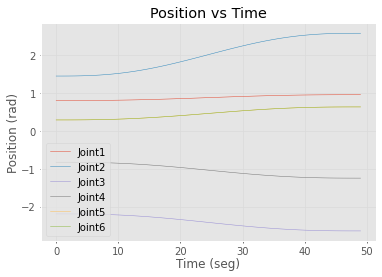

In [118]:
plt.plot(time,pos)
plt.title("Position vs Time")
plt.xlabel("Time (seg)")
plt.ylabel("Position (rad)")
plt.legend(["Joint1","Joint2","Joint3","Joint4","Joint5","Joint6"])

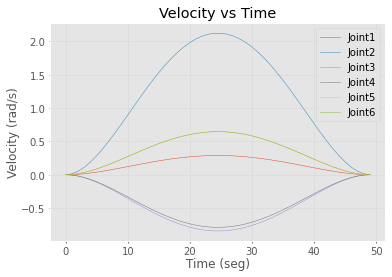

In [119]:
plt.plot(time,vel)
plt.title("Velocity vs Time")
plt.xlabel("Time (seg)")
plt.ylabel("Velocity (rad/s)")
plt.legend(["Joint1","Joint2","Joint3","Joint4","Joint5","Joint6"])

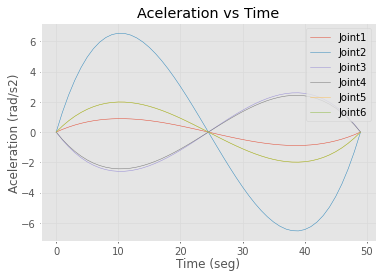

In [120]:
plt.plot(time,acc)
plt.title("Aceleration vs Time")
plt.xlabel("Time (seg)")
plt.ylabel("Aceleration (rad/s2)")
plt.legend(["Joint1","Joint2","Joint3","Joint4","Joint5","Joint6"])

## Screw Linear Interpolation

In [ ]:
Kuka120.addconfiguration('qz', [0, 0, 0, 0, 0, 0])
Kuka120.addconfiguration('qr', [0, pi/2, 0, 0, 0, 0])
Kuka120.addconfiguration('qs', [0, 0, 0, pi/2, 0, 0])
Kuka120.addconfiguration('qt', [0, 0, 0, 0, 0, pi/2])
Kuka120.addconfiguration('qy', [0, 0, 0, 0, pi/2, 0])

# shows the robot
Kuka120.plot(Kuka120.configs['qz'], block=False)
Kuka120.plot(Kuka120.configs['qr'], block=False)
Kuka120.plot(Kuka120.configs['qs'], block=False)
Kuka120.plot(Kuka120.configs['qt'], block=False)
Kuka120.plot(Kuka120.configs['qy'], block=False)


In [122]:
ang_init = Kuka120.configs['qz']
ang_first = Kuka120.configs['qr']
ang_second = Kuka120.configs['qs']
ang_third = Kuka120.configs['qt']
ang_end = Kuka120.configs['qy']
                            

In [1]:
#Matriz de transformación
H1=Kuka120.fkine(ang_init)
H2=Kuka120.fkine(ang_second)
H3=Kuka120.fkine(ang_third)
H4=Kuka120.fkine(ang_end)
tau = 0
step = 0.3

NameError: name 'Kuka120' is not defined

In [124]:
def convtodualquatern(H):
    R1 = H.R 
    T1 = H.t 
    M = np.ones((4,4)) 
    M[0:3,0:3]=R1 
    M[0:3,3]=T1
    Dquat = DualQuaternion.from_homogeneous_matrix(M)
    return Dquat

In [125]:
def Sclerp(tau,step,DQuat1,DQuat2):
    Dua_quat = []
    while tau<=1:
        DQuat = DualQuaternion.sclerp(DQuat1,DQuat2,tau)
        Dua_quat.append(DQuat) 
        tau+=step
    return Dua_quat

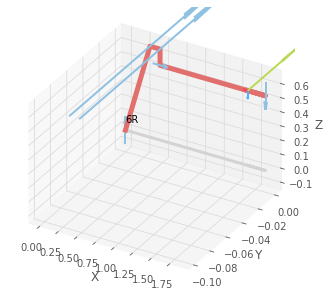

1.6449999999999998
2.220446049250313e-16
0.5299999999999999


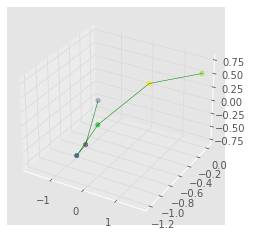

In [128]:
qua_init = convtodualquatern(H1)
qua_sec = convtodualquatern(H2)
Dua_quat = Sclerp(tau,step,qua_init,qua_sec)

x_graph = []
y_graph = []
z_graph = []
for DQ in Dua_quat:  #for each Dual quaternion 
    SHT = SE3(DQ.homogeneous_matrix()) #Transformation from dual quat to HT
    inKi = Kuka120.ikine_LM(SHT)#The inverse kinematics
    final = inKi[0]#Add the target configuration
    trayec1 = SHT.t[0]
    trayec2 = SHT.t[1]
    trayec3 = SHT.t[2]
    x_graph.append(trayec1)
    
    y_graph.append(trayec2)
    z_graph.append(trayec3)
qt_i = rtb.jtraj(ang_init, ang_second, 50)
Kuka120.plot(qt_i.q)
print(x_graph[-1])
print(y_graph[-1])
print(z_graph[-1])
ax3d= plt.axes(projection='3d')
ax3d.plot(x_graph, y_graph, z_graph, 'g')
ax3d.scatter3D(x_graph, y_graph, z_graph,c=z_graph)

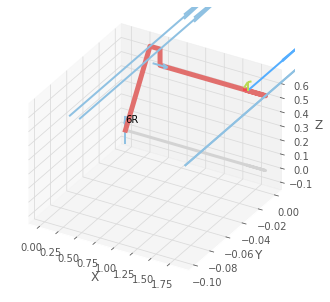

1.885
0.24000000000000055
0.5300000000000002


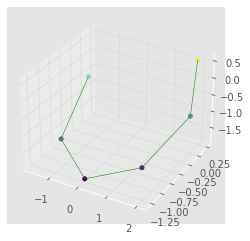

In [131]:
qua_third = convtodualquatern(H3)
Dua_quat2 = Sclerp(tau,step,qua_sec,qua_third)

x_graph2 = []
y_graph2 = []
z_graph2 = []
for DQ in Dua_quat2:  #for each Dual quaternion 
    SHT2 = SE3(DQ.homogeneous_matrix()) #Transformation from dual quat to HT
    inKi2 = Kuka120.ikine_LM(SHT2)#The inverse kinematics
    final2 = inKi2[0]#Add the target configuration
    trayec1_2 = SHT2.t[0]
    trayec2_2 = SHT2.t[1]
    trayec3_2 = SHT2.t[2]
    x_graph2.append(trayec1_2)
    y_graph2.append(trayec2_2)
    z_graph2.append(trayec3_2)
qt_i2 = rtb.jtraj(ang_second, ang_third, 50)
Kuka120.plot(qt_i2.q)
print(x_graph2[-1])
print(y_graph2[-1])
print(z_graph2[-1])
ax3d= plt.axes(projection='3d')
ax3d.plot(x_graph2, y_graph2, z_graph2, 'g')
ax3d.scatter3D(x_graph2, y_graph2, z_graph2,c=z_graph2)

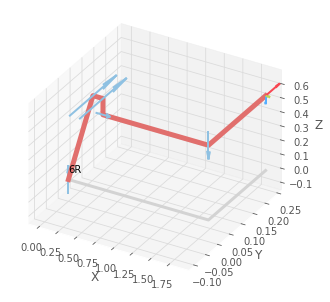

1.885
0.24000000000000055
0.5300000000000002


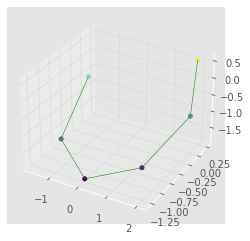

In [133]:
qua_end = convtodualquatern(H4)
Dua_quat3 = Sclerp(tau,step,qua_third,qua_end)

x_graph3 = []
y_graph3 = []
z_graph3 = []
for DQ in Dua_quat2:  #for each Dual quaternion 
    SHT3 =SE3(DQ.homogeneous_matrix()) #Transformation from dual quat to HT
    inKi3 = Kuka120.ikine_LM(SHT3)#The inverse kinematics
    final3 = inKi3[0]#Add the target configuration
    trayec1_3 = SHT3.t[0]
    trayec2_3 = SHT3.t[1]
    trayec3_3 = SHT3.t[2]
    x_graph3.append(trayec1_3)
    y_graph3.append(trayec2_3)
    z_graph3.append(trayec3_3)
qt_i3 = rtb.jtraj(ang_third, ang_end, 50)
Kuka120.plot(qt_i3.q)    
print(x_graph3[-1])
print(y_graph3[-1])
print(z_graph3[-1])
ax3d= plt.axes(projection='3d')
ax3d.plot(x_graph3, y_graph3, z_graph3, 'g')
ax3d.scatter3D(x_graph3, y_graph3, z_graph3,c=z_graph3)